In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [141]:
data = pd.read_csv('../train_wo_missing_values.csv')
test = pd.read_csv('../test.csv')

### Drop Outliers

In [142]:
data.drop(index=[523,1298], inplace=True)

### Transform Data and Dummify

In [143]:
from transform_full import transform_dataset

In [144]:
x, y = transform_dataset(data)

In [145]:
x.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotGrBsmtArea,Q406,Q407,Q408,Q409,Q410
0,4.189655,9.042040,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,...,0,0,1,0,454.617673,False,False,False,False,False
1,4.394449,9.169623,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,...,0,0,1,0,467.626742,False,False,False,False,False
2,4.234107,9.328212,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,...,0,0,1,0,476.774707,False,False,False,False,False
3,4.110874,9.164401,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,...,0,0,0,0,452.552523,False,False,False,False,False
4,4.442651,9.565284,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,...,0,0,1,0,518.526120,False,False,False,False,False


### Evaluation Metric

In [146]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [147]:
def rmse_cv_lasso(model):
    rmse= np.sqrt(-cross_val_score(model, x_1, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Lasso

In [148]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

In [149]:
from sklearn.preprocessing import StandardScaler

#### Train

In [150]:
x3 = x.copy()

In [151]:
scaler = StandardScaler()
x_1 = scaler.fit_transform(x3)

In [49]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], max_iter=100000).fit(x_1, y)

#### Results

In [50]:
print('R2 = {}'.format(lasso.score(x_1, y)))
print('RMSE = {}'.format(rmse_cv_lasso(lasso).mean()))

R2 = 0.9455535270029988
RMSE = 0.11569588560269273


#### Feature Importance

In [51]:
coef = lasso.coef_ != 0
print('Lasso used {} of {} variables'.format(coef.sum(), len(coef)))

Lasso used 189 of 323 variables


<BarContainer object of 20 artists>

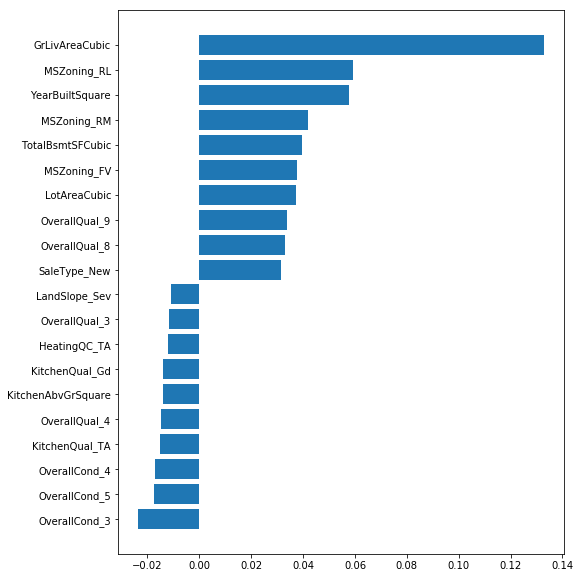

In [95]:
plt.figure(figsize=(8, 10))
coef_sorted = pd.Series(lasso.coef_, index=x.columns).sort_values(ascending=False)
top_coef = pd.concat([coef_sorted.head(10), coef_sorted.tail(10)]).sort_values()
plt.barh(top_coef.index, top_coef.values)

In [58]:
lasso.alpha_

0.001

### GBM

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

#### Train

Selecting default parameters:
min_samples_split is approximatly 1% of total number of observations
min_samples_leaf should be lower than min_samples_split
max_features sqrt is the thumb-rule
max_depth based on intuition

In [112]:
gbm = GradientBoostingRegressor(n_estimators=1000, max_features='sqrt', min_samples_split=100, min_samples_leaf=10, max_depth=7, subsample=0.8, learning_rate=0.1)
gbm.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=100,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=0.8, verbose=0,
             warm_start=False)

#### Results

In [113]:
print('R2 = {}'.format(gbm.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gbm).mean()))

R2 = 0.9990147566974117
RMSE = 0.12680553096107283


#### Feature Importance

In [114]:
len(x.columns)

323

In [115]:
feature_importance_gbm = pd.Series(gbm.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importance_gbm[:25]

GrLivAreaCubic       0.024616
LotGrBsmtArea        0.024253
GrLivArea            0.023822
GrLivAreaSquare      0.022326
BsmtUnfSFCubic       0.021813
1stFlrSFCubic        0.021774
1stFlrSFSquare       0.019952
LotArea              0.019792
BsmtUnfSFSquare      0.019245
BsmtUnfSF            0.019236
1stFlrSF             0.018899
LotAreaCubic         0.018781
GarageArea           0.018125
TotalBsmtSFSquare    0.018045
LotAreaSquare        0.017055
GarageYrBlt          0.016508
TotalBsmtSF          0.015695
GarageAreaCubic      0.015407
GarageAreaSquare     0.015135
TotalBsmtSFCubic     0.015041
GarageYrBltCubic     0.013561
LotFrontage          0.012943
GarageYrBltSquare    0.012832
YearBuilt            0.012798
MoSoldSquare         0.012247
dtype: float64

<BarContainer object of 20 artists>

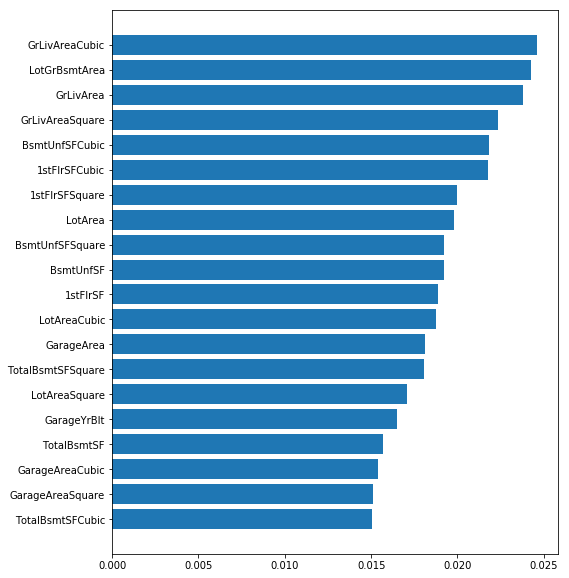

In [116]:
plt.figure(figsize=(8, 10))
feature_top20 = feature_importance_gbm[:20].sort_values()
plt.barh(feature_top20.index, feature_top20.values)

#### Tuning parameters with GridSearch

In [76]:
from sklearn.model_selection import GridSearchCV

##### First Attempt (n_estimators)

Train

In [79]:
param_test1 = {'n_estimators':range(200,1501,10)}
gsearch1_gbm = GridSearchCV(gbm, param_grid=param_test1, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5)
gsearch1_gbm.fit(x, y)
gsearch1_gbm.grid_scores_, gsearch1_gbm.best_params_, gsearch1_gbm.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01559, std: 0.00146, params: {'n_estimators': 200},
  mean: -0.01517, std: 0.00165, params: {'n_estimators': 210},
  mean: -0.01599, std: 0.00088, params: {'n_estimators': 220},
  mean: -0.01514, std: 0.00166, params: {'n_estimators': 230},
  mean: -0.01557, std: 0.00140, params: {'n_estimators': 240},
  mean: -0.01547, std: 0.00152, params: {'n_estimators': 250},
  mean: -0.01547, std: 0.00166, params: {'n_estimators': 260},
  mean: -0.01514, std: 0.00174, params: {'n_estimators': 270},
  mean: -0.01590, std: 0.00126, params: {'n_estimators': 280},
  mean: -0.01609, std: 0.00150, params: {'n_estimators': 290},
  mean: -0.01554, std: 0.00157, params: {'n_estimators': 300},
  mean: -0.01541, std: 0.00150, params: {'n_estimators': 310},
  mean: -0.01585, std: 0.00136, params: {'n_estimators': 320},
  mean: -0.01563, std: 0.00152, params: {'n_estimators': 330},
  mean: -0.01552, std: 0.00122, params: {'n_estimators': 340},
  mean: -0.01575, std: 0.00137, params: {'n_estimators'

Results

In [80]:
print('R2 = {}'.format(gsearch1_gbm.best_estimator_.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gsearch1_gbm.best_estimator_).mean()))

R2 = 0.9844884116047558
RMSE = 0.124422147126992


##### Second Attempt (max_depth and min_samples_split)

In [94]:
param_test2 = {'max_depth':range(3,12,2), 'min_samples_split':range(20,121,20)}
gsearch2_gbm = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=380, max_features='sqrt', subsample=0.8, min_samples_leaf=10), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2_gbm.fit(x,y)
gsearch2_gbm.grid_scores_, gsearch2_gbm.best_params_, gsearch2_gbm.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01493, std: 0.00135, params: {'max_depth': 3, 'min_samples_split': 20},
  mean: -0.01460, std: 0.00131, params: {'max_depth': 3, 'min_samples_split': 40},
  mean: -0.01507, std: 0.00173, params: {'max_depth': 3, 'min_samples_split': 60},
  mean: -0.01518, std: 0.00121, params: {'max_depth': 3, 'min_samples_split': 80},
  mean: -0.01515, std: 0.00175, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: -0.01514, std: 0.00099, params: {'max_depth': 3, 'min_samples_split': 120},
  mean: -0.01501, std: 0.00183, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: -0.01569, std: 0.00153, params: {'max_depth': 5, 'min_samples_split': 40},
  mean: -0.01565, std: 0.00176, params: {'max_depth': 5, 'min_samples_split': 60},
  mean: -0.01494, std: 0.00138, params: {'max_depth': 5, 'min_samples_split': 80},
  mean: -0.01570, std: 0.00153, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: -0.01543, std: 0.00140, params: {'max_depth': 5, 'min_samples_split': 120},


Results

In [95]:
print('R2 = {}'.format(gsearch2_gbm.best_estimator_.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gsearch2_gbm.best_estimator_).mean()))

R2 = 0.9593991505555762
RMSE = 0.12177661497642918


##### Third Attempt (min_samples_leaf and min_samples_split)

In [96]:
param_test3 = {'min_samples_split':range(20,161,20), 'min_samples_leaf':range(10,61,10)}
gsearch3_gbm = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=380, max_features='sqrt', subsample=0.8, max_depth=3), 
param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3_gbm.fit(x,y)
gsearch3_gbm.grid_scores_, gsearch3_gbm.best_params_, gsearch3_gbm.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01535, std: 0.00109, params: {'min_samples_leaf': 10, 'min_samples_split': 20},
  mean: -0.01481, std: 0.00179, params: {'min_samples_leaf': 10, 'min_samples_split': 40},
  mean: -0.01484, std: 0.00158, params: {'min_samples_leaf': 10, 'min_samples_split': 60},
  mean: -0.01466, std: 0.00105, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: -0.01559, std: 0.00163, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: -0.01503, std: 0.00164, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: -0.01528, std: 0.00138, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: -0.01494, std: 0.00134, params: {'min_samples_leaf': 10, 'min_samples_split': 160},
  mean: -0.01597, std: 0.00161, params: {'min_samples_leaf': 20, 'min_samples_split': 20},
  mean: -0.01579, std: 0.00118, params: {'min_samples_leaf': 20, 'min_samples_split': 40},
  mean: -0.01570, std: 0.00142, params: {'min_samples_leaf': 20, 'min_samples_split': 

In [129]:
print('R2 = {}'.format(gsearch3_gbm.best_estimator_.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gsearch3_gbm.best_estimator_).mean()))

R2 = 0.9564891048272538
RMSE = 0.12342047303647943


##### Forth Attempt (max_features)

In [104]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4_gbm = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=380, min_samples_split=80, min_samples_leaf=10, subsample=0.8, max_depth=7), 
param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4_gbm.fit(x,y)
gsearch4_gbm.grid_scores_, gsearch4_gbm.best_params_, gsearch4_gbm.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01557, std: 0.00204, params: {'max_features': 7},
  mean: -0.01575, std: 0.00189, params: {'max_features': 9},
  mean: -0.01631, std: 0.00185, params: {'max_features': 11},
  mean: -0.01551, std: 0.00147, params: {'max_features': 13},
  mean: -0.01562, std: 0.00200, params: {'max_features': 15},
  mean: -0.01496, std: 0.00176, params: {'max_features': 17},
  mean: -0.01578, std: 0.00182, params: {'max_features': 19}],
 {'max_features': 17},
 -0.01495935369113261)

In [127]:
print('R2 = {}'.format(gsearch4_gbm.best_estimator_.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gsearch4_gbm.best_estimator_).mean()))

R2 = 0.9888047770339554
RMSE = 0.1261835044588583


#### Fifth Attempt (subsample)

In [117]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5_gbm = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=380,max_depth=7,min_samples_split=80, min_samples_leaf=10, subsample=0.8, max_features=13),
param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch5_gbm.fit(x, y)
gsearch5_gbm.grid_scores_, gsearch5_gbm.best_params_, gsearch5_gbm.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01546, std: 0.00310, params: {'subsample': 0.6},
  mean: -0.01537, std: 0.00391, params: {'subsample': 0.7},
  mean: -0.01537, std: 0.00409, params: {'subsample': 0.75},
  mean: -0.01539, std: 0.00406, params: {'subsample': 0.8},
  mean: -0.01535, std: 0.00342, params: {'subsample': 0.85},
  mean: -0.01556, std: 0.00453, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 -0.015352018648432724)

In [126]:
print('R2 = {}'.format(gsearch5_gbm.best_estimator_.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gsearch5_gbm.best_estimator_).mean()))

R2 = 0.9878610628143983
RMSE = 0.12544152637119224


#### Final Attempt

In [400]:
gbm = GradientBoostingRegressor(learning_rate=0.05, n_estimators=760, min_samples_split=80, min_samples_leaf=10, subsample=0.85, max_depth=7)
gbm.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=80, min_weight_fraction_leaf=0.0,
             n_estimators=760, presort='auto', random_state=None,
             subsample=0.85, verbose=0, warm_start=False)

In [401]:
print('R2 = {}'.format(gbm.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gbm).mean()))

R2 = 0.9962930230790022
RMSE = 0.12520170995560514


### XGBoost

In [129]:
from xgboost import XGBRegressor

#### Train

In [130]:
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=1000, random_state=10)
xgboost.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### Results

In [131]:
print('R2 = {}'.format(xgboost.score(x, y)))
print('RMSE = {}'.format(rmse_cv(xgboost).mean()))

R2 = 0.9467032410572237
RMSE = 0.13001986090271195


#### Feature Importance

In [132]:
feature_importance_xgboost = pd.Series(xgboost.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importance_xgboost[:10]

GrLivArea        0.060782
LotGrBsmtArea    0.059549
YearBuilt        0.046159
GarageArea       0.040169
BsmtFinSF1       0.037879
1stFlrSF         0.034003
YearRemodAdd     0.033298
LotArea          0.026075
GarageYrBlt      0.025899
WoodDeckSF       0.023608
dtype: float32

<BarContainer object of 20 artists>

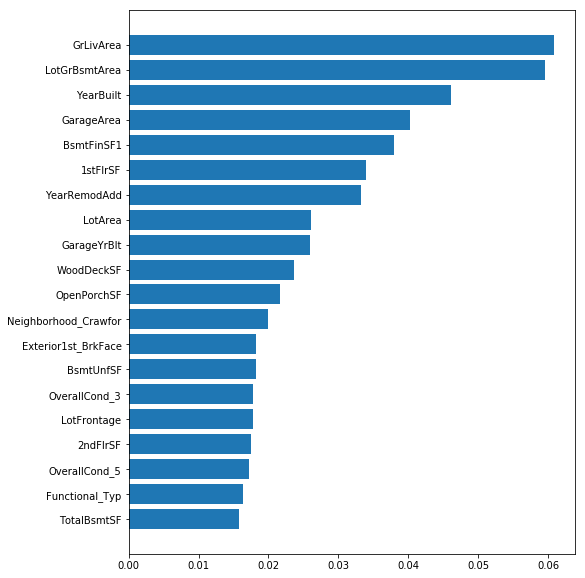

In [133]:
plt.figure(figsize=(8, 10))
feature_top20 = feature_importance_xgboost[:20].sort_values()
plt.barh(feature_top20.index, feature_top20.values)

#### Tuning parameters with Bayesian Optimization

In [746]:
x['LotGrBsmtArea'] = x['GrLivArea'] * x['LotArea'] * x['TotalBsmtSF']
x['GrLivAreaSquare'] = x['GrLivArea']**2
x['GrLivAreaCubic'] = x['GrLivArea']**3
x['Q406'] = ((x['MoSold'] == 10) | (x['MoSold'] == 11) | (x['MoSold'] == 12) & (x['YrSold'] == 2006))
x['Q407'] = ((x['MoSold'] == 10) | (x['MoSold'] == 11) | (x['MoSold'] == 12) & (x['YrSold'] == 2007))
x['Q408'] = ((x['MoSold'] == 10) | (x['MoSold'] == 11) | (x['MoSold'] == 12) & (x['YrSold'] == 2008))
x['Q409'] = ((x['MoSold'] == 10) | (x['MoSold'] == 11) | (x['MoSold'] == 12) & (x['YrSold'] == 2009))
x['Q410'] = ((x['MoSold'] == 10) | (x['MoSold'] == 11) | (x['MoSold'] == 12) & (x['YrSold'] == 2010))

In [203]:
def xgboostcv(max_depth, min_child_weight, gamma, colsample_bytree, subsample, reg_alpha, n_estimators):
    val = cross_val_score(
        XGBRegressor(max_depth=int(max_depth),
            min_child_weight=int(min_child_weight),
            gamma= max(gamma, 0),
            colsample_bytree=max(min(colsample_bytree, 1), 0),
            subsample=max(min(subsample, 1), 0),
            reg_alpha=max(reg_alpha, 0),
            learning_rate=0.01,
            n_estimators=int(n_estimators),
            random_state=10
        ),
        x, y, scoring='neg_mean_squared_error', cv=5
    ).mean()
    return val

In [204]:
from bayes_opt import BayesianOptimization

In [205]:
gp_params = {"alpha": 1e-5}

In [206]:
xgboostBO = BayesianOptimization(
        xgboostcv,
        {'min_child_weight': (1, 20),
         'colsample_bytree': (0.1, 1),
         'max_depth': (5, 15),
         'subsample': (0.5, 1),
         'gamma': (0, 0.5),
         'reg_alpha': (0, 10),
         'n_estimators':(200, 1100)
        }
    )

In [207]:
xgboostBO.maximize(n_iter=10, **gp_params)

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   n_estimators |   reg_alpha |   subsample | 
    1 | 00m05s |   -0.02882 |             0.1168 |    0.1449 |     14.1819 |            18.7132 |       766.3116 |      7.3060 |      0.7353 | 
    2 | 00m14s |   -0.02734 |             0.4886 |    0.3387 |      7.6572 |            12.3557 |       652.8658 |      5.0125 |      0.6763 | 
    3 | 00m28s |   -0.02134 |             0.5040 |    0.0883 |      9.2821 |            15.3339 |       934.2739 |      4.0382 |      0.8542 | 
    4 | 00m04s |   -1.22807 |             0.9820 |    0.3605 |      6.0807 |             4.9991 |       238.9891 |      7.7231 |      0.8645 | 
    5 | 00m51s |   -0.02027 |             0.6585 |    0.2655 |     14.6669 |             7.6877 |       983.3159 |      0.

In [208]:
print('XGBoost: %f' % xgboostBO.res['max']['max_val'])

XGBoost: -0.015799


In [791]:
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=1050, max_depth=5, min_child_weight=20, gamma=0, colsample_bytree=1, subsample=1, reg_alpha=0, random_state=10)
xgboost.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=20, missing=None, n_estimators=1050,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [792]:
print('R2 = {}'.format(xgboost.score(x, y)))
print('RMSE = {}'.format(rmse_cv(xgboost).mean()))

R2 = 0.9577296156489108
RMSE = 0.1266189553082544


In [231]:
def gbmcv(max_depth, max_features, min_samples_leaf, min_samples_split, subsample, n_estimators):
    val = cross_val_score(
        GradientBoostingRegressor(max_depth=int(max_depth),
            max_features=int(max_features),
            min_samples_leaf= max(min(min_samples_leaf, 1), 0),
            min_samples_split=max(min(min_samples_split, 2), 0),
            subsample=max(min(subsample, 1), 0),
            n_estimators=int(n_estimators),
            learning_rate=0.01,
            random_state=10
        ),
        x, y, scoring='neg_mean_squared_error', cv=5
    ).mean()
    return val

In [232]:
gbmBO = BayesianOptimization(
        gbmcv,
        {'max_features': (4, 20),
         'min_samples_leaf': (10, 60),
         'max_depth': (3, 15),
         'subsample': (0.5, 1),
         'min_samples_split': (20, 120),
         'n_estimators':(200, 1200)
        }
    )

In [233]:
gbmBO.maximize(n_iter=15, **gp_params)

Initialization
--------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   min_samples_leaf |   min_samples_split |   n_estimators |   subsample | 
    1 | 00m08s |   -0.01593 |      8.1509 |        12.8725 |            30.0692 |             88.5846 |       705.7768 |      0.7523 | 
    2 | 00m03s |   -0.02117 |     12.1065 |         5.6966 |            27.8477 |             24.5862 |       309.2079 |      0.6533 | 
    3 | 00m11s |   -0.01712 |      9.7380 |        14.8333 |            51.1682 |             38.6978 |       608.9703 |      0.9037 | 
    4 | 00m03s |   -0.01563 |      4.9762 |         8.3618 |            26.6382 |             84.8744 |       996.0290 |      0.8818 | 
    5 | 00m21s |   -0.01650 |     13.4217 |        14.9990 |            56.3629 |             21.6501 |       989.3350 |      0.5065 | 
Bayesian Optimization
------------

In [789]:
gbm = GradientBoostingRegressor(n_estimators=1200, max_features=12, min_samples_split=20, min_samples_leaf=11, max_depth=6, subsample=0.7, learning_rate=0.01,random_state=10)
gbm.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=12,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1200, presort='auto', random_state=10,
             subsample=0.7, verbose=0, warm_start=False)

In [790]:
print('R2 = {}'.format(gbm.score(x, y)))
print('RMSE = {}'.format(rmse_cv(gbm).mean()))

R2 = 0.9720017815740264
RMSE = 0.1228535020161946


In [307]:
from sklearn.metrics import mean_squared_error
print('RMSE Train = {}'.format(np.sqrt(mean_squared_error(y, gbm.predict(x)))))

RMSE Train = 0.0728038901740424


### Residuals Plot

In [139]:
from scipy import stats 

In [152]:
test = pd.DataFrame({'y':y, 'resid':y - lasso.predict(x_1)})

In [153]:
import statsmodels.api as sm
import pylab

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.06387150361747913 -0.7679915126854122 0.27372991608191


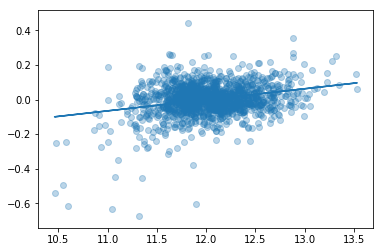

In [154]:
plt.scatter(test['y'], test['resid'], alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(y, test['resid'])
print(slope, intercept, r_value)
y_fit = intercept + slope*y
plt.plot(y, y_fit)

0.06210383880200998 -0.7464065359725621 0.30206740403251514


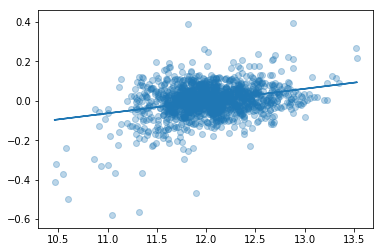

In [251]:
plt.scatter(y, y - xgboost.predict(x), alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(y, y - xgboost.predict(x))
print(slope, intercept, r_value)
y_fit = intercept + slope*y
plt.plot(y, y_fit)

0.051304120426080305 -0.616737144538831 0.2815791097667614 5.621268309950351e-28


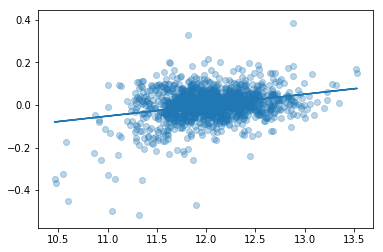

In [303]:
plt.scatter(y, y - gbm.predict(x), alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(y, y - gbm.predict(x))
print(slope, intercept, r_value, p_value)
y_fit = intercept + slope*y
plt.plot(y, y_fit)

### Ensemble

In [801]:
y_gbm = gbm.predict(x)
y_xgboost = xgboost.predict(x)
y_lasso = lasso.predict(x)

In [802]:
z = 0.5*y_gbm + 0.2*y_xgboost + 0.3*y_lasso

In [803]:
print('RMSE Train = {}'.format(np.sqrt(mean_squared_error(y, z))))

RMSE Train = 0.07688419793529305


0.05799389654131518 -0.6971821939523148 0.30140316679103835 5.333506736786494e-32


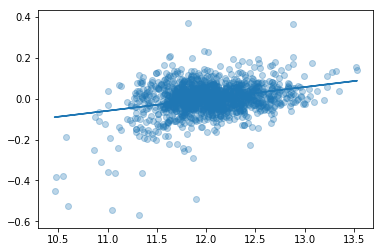

In [804]:
plt.scatter(y, y - z, alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(y, y - z)
print(slope, intercept, r_value, p_value)
y_fit = intercept + slope*y
plt.plot(y, y_fit)

### Final Results

In [160]:
test = pd.read_csv('../test_wo_missing_values.csv')

In [161]:
%reload_ext autoreload

In [162]:
from transform_full import transform_dataset_test

In [163]:
test = transform_dataset_test(test)

In [164]:
test1 = pd.DataFrame({}, columns=x.columns)
test = pd.concat([test1, test], axis=0)
test = test.loc[:,x.columns]
test.shape

(1459, 323)

In [165]:
test = test.fillna(False)

In [504]:
test['LotGrBsmtArea'] = test['GrLivArea'] * test['LotArea'] * test['TotalBsmtSF']
test['GrLivAreaSquare'] = test['GrLivArea']**2
test['GrLivAreaCubic'] = test['GrLivArea']**3
test['Q406'] = ((test['MoSold'] == 10) | (test['MoSold'] == 11) | (test['MoSold'] == 12) & (test['YrSold'] == 2006))
test['Q407'] = ((test['MoSold'] == 10) | (test['MoSold'] == 11) | (test['MoSold'] == 12) & (test['YrSold'] == 2007))
test['Q408'] = ((test['MoSold'] == 10) | (test['MoSold'] == 11) | (test['MoSold'] == 12) & (test['YrSold'] == 2008))
test['Q409'] = ((test['MoSold'] == 10) | (test['MoSold'] == 11) | (test['MoSold'] == 12) & (test['YrSold'] == 2009))
test['Q410'] = ((test['MoSold'] == 10) | (test['MoSold'] == 11) | (test['MoSold'] == 12) & (test['YrSold'] == 2010))

In [166]:
test.shape

(1459, 323)

In [812]:
y_gbm = gbm.predict(test)
y_xgboost = xgboost.predict(test)
y_lasso = lasso.predict(test)

In [813]:
z = 0.55*y_gbm + 0.45*y_lasso

In [814]:
test_original = pd.read_csv('../test.csv')

In [815]:
final_df = pd.DataFrame({'Id':test_original['Id'], 'SalePrice':np.exp(z)})

In [816]:
final_df.to_csv("../submit.csv", float_format='%f', index=False) 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
x2 = pd.read_csv('../x2.csv')

# Select x2 for GBM model
gbrt_data = x2 # x2  CV best 0.11289845824788566 estimators 290
               # CV 0.11729470546988634 and test 0.12720594564487064
               # max_depth=2, n_estimators=500, learning_rate=0.069, random_state=42, min_samples_split = 2

# GBM model staged to get best model
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500, learning_rate=0.069, random_state=42,
                               min_samples_split = 2)
X_train, X_val, y_train, y_val = train_test_split(gbrt_data, y, random_state=49)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

# CV on GBM to get RMSE and R2
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbrt_best, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

gbm_rmse_scores = np.sqrt(-scores)
r2 = cross_val_score(gbrt_best, X_train, y_train, cv=10)
# R2
r2.mean()
# mean of best run in CV
gbm_rmse_scores.mean()

0.11040141128712413

0.052867181864885385 -0.6365886259446369 0.2386700829468221 2.4800956804202108e-20


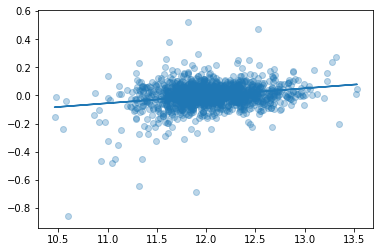

In [155]:
plt.scatter(y, y - gbrt_best.predict(x2), alpha=0.3)
slope, intercept, r_value, p_value, std_err = stats.linregress(y, y - gbrt_best.predict(x2))
print(slope, intercept, r_value, p_value)
y_fit = intercept + slope*y
plt.plot(y, y_fit)

<BarContainer object of 20 artists>

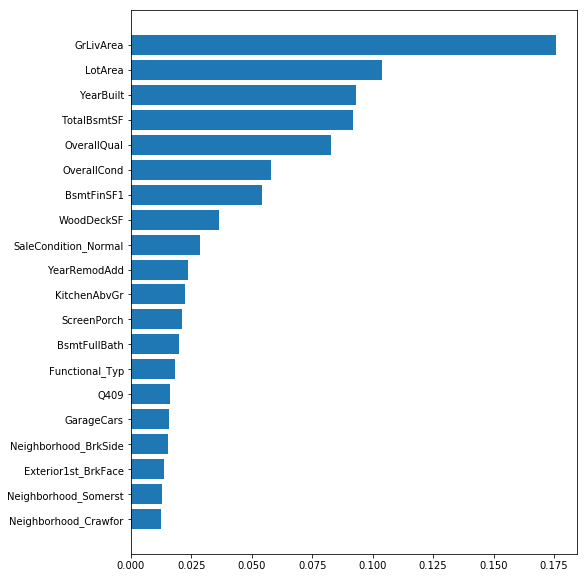

In [104]:
plt.figure(figsize=(8, 10))
feature_importance_gbm = pd.Series(gbrt_best.feature_importances_, index=x2.columns).sort_values(ascending=False)
feature_top20 = feature_importance_gbm[:20].sort_values()
plt.barh(feature_top20.index, feature_top20.values)

In [63]:
print('RMSE Train = {}'.format(np.sqrt(mean_squared_error(y, gbrt_best.predict(x2)))))

RMSE Train = 0.08851425341425455


In [167]:
house_prices_dummy = pd.read_csv('../test_wo_missing_values.csv')

In [168]:
house_prices_dummy = pd.get_dummies(house_prices_dummy, drop_first=True)

In [169]:
house_prices_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_No,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [170]:
test_1 = pd.DataFrame({}, columns=x2.columns)
house_prices_dummy2 = pd.concat([test_1, house_prices_dummy], axis=0)
house_prices_dummy2 = house_prices_dummy.loc[:,x2.columns]
house_prices_dummy2.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(1459, 36)

In [171]:
house_prices_dummy2['Q406'] = ((house_prices_dummy['MoSold'] == 10) | (house_prices_dummy['MoSold'] == 11) | (house_prices_dummy['MoSold'] == 12) & (house_prices_dummy['YrSold'] == 2006))
house_prices_dummy2['Q407'] = ((house_prices_dummy['MoSold'] == 10) | (house_prices_dummy['MoSold'] == 11) | (house_prices_dummy['MoSold'] == 12) & (house_prices_dummy['YrSold'] == 2007))
house_prices_dummy2['Q408'] = ((house_prices_dummy['MoSold'] == 10) | (house_prices_dummy['MoSold'] == 11) | (house_prices_dummy['MoSold'] == 12) & (house_prices_dummy['YrSold'] == 2008))

house_prices_dummy2['Q409'] = ((house_prices_dummy['MoSold'] == 10) | (house_prices_dummy['MoSold'] == 11) | (house_prices_dummy['MoSold'] == 12) & (house_prices_dummy['YrSold'] == 2009))
house_prices_dummy2['Q410'] = ((house_prices_dummy['MoSold'] == 10) | (house_prices_dummy['MoSold'] == 11) | (house_prices_dummy['MoSold'] == 12) & (house_prices_dummy['YrSold'] == 2010))
result2= ['OverallQual','GrLivArea','YearBuilt','BsmtFinSF1','OverallCond','TotalBsmtSF','GarageCars','FireplaceQu_Gd','LotArea','Foundation_PConc','Neighborhood_Crawfor','SaleType_New','SaleCondition_Normal','CentralAir_Y','BsmtExposure_Gd','BldgType_Twnhs','Condition1_Norm','KitchenAbvGr','BsmtFullBath','Functional_Typ','ScreenPorch','Street_Pave','Neighborhood_NridgHt','Neighborhood_StoneBr','Neighborhood_Somerst','MSZoning_RL','Exterior1st_BrkFace','Neighborhood_MeadowV','WoodDeckSF','YearRemodAdd','Neighborhood_BrkSide','Q406','Q407','Q408','Q409','Q410']
house_prices_dummy2 = house_prices_dummy2[result2]

In [172]:
house_prices_dummy2.head()

,OverallQual,GrLivArea,YearBuilt,BsmtFinSF1,OverallCond,TotalBsmtSF,GarageCars,FireplaceQu_Gd,LotArea,Foundation_PConc,...,Exterior1st_BrkFace,Neighborhood_MeadowV,WoodDeckSF,YearRemodAdd,Neighborhood_BrkSide,Q406,Q407,Q408,Q409,Q410
0,5,896,1961,468.0,6,882.0,1.0,0,11622,0,...,0,0,140,1961,0,False,False,False,False,False
1,6,1329,1958,923.0,6,1329.0,1.0,0,14267,0,...,0,0,393,1958,0,False,False,False,False,False
2,5,1629,1997,791.0,5,928.0,2.0,0,13830,1,...,0,0,212,1998,0,False,False,False,False,False
3,6,1604,1998,602.0,6,926.0,2.0,1,9978,1,...,0,0,360,1998,0,False,False,False,False,False
4,8,1280,1992,263.0,5,1280.0,2.0,0,5005,1,...,0,0,0,1992,0,False,False,False,False,False


In [173]:
house_prices_dummy2.fillna(0, inplace=True)

In [174]:
z = gbrt_best.predict(house_prices_dummy2)

In [73]:
test_original = pd.read_csv('../test.csv')

In [74]:
final_df = pd.DataFrame({'Id':test_original['Id'], 'SalePrice':np.exp(z)})

In [75]:
final_df.to_csv("../submit.csv", float_format='%f', index=False) 

### Ensemble Final

In [76]:
y_gbm_2 = gbrt_best.predict(house_prices_dummy2)

In [754]:
y_gbm = gbm.predict(x)
y_xgboost = xgboost.predict(x)

In [84]:
x_1 = scaler.transform(test)

In [85]:
y_lasso = lasso.predict(x_1)

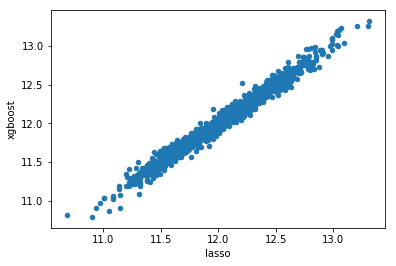

In [755]:
predictions = pd.DataFrame({"gbm":y_gbm_2, "lasso":y_lasso, "xgboost":y_xgboost})
predictions.plot(x = "lasso", y = "xgboost", kind = "scatter")

In [707]:
from sklearn.metrics import r2_score

In [769]:
z = 0.5*y_gbm_2 + 0.5*y_lasso

In [770]:
print('R2 Score = {}'.format(r2_score(y, z)))

R2 Score = 0.9482395716465755


In [771]:
print('RMSE Train = {}'.format(np.sqrt(mean_squared_error(y, z))))

RMSE Train = 0.09090773806131212


In [180]:
y_gbm = gbm.predict(test)
y_xgboost = xgboost.predict(test)
y_lasso = lasso.predict(scaler.transform(test))

In [181]:
y_gbm_2 = gbrt_best.predict(house_prices_dummy2)

In [182]:
z = 0.30*y_gbm_2 + 0.70*y_lasso

In [183]:
z

array([11.70016436, 11.96878902, 12.1611091 , ..., 12.0246024 ,
       11.70214893, 12.3230842 ])

In [184]:
final_df = pd.DataFrame({'Id':test_original['Id'], 'SalePrice':np.exp(z)})

In [185]:
final_df.to_csv("../submit.csv", float_format='%f', index=False)

### Stacking

In [156]:
from sklearn.model_selection import train_test_split

In [158]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=42)